In [1]:
import sys
import math
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.stats import t, chi2, f, norm, poisson, binom, uniform

np.set_printoptions(suppress = True)                      # уберем scientific notation

# Задания

№1. Симулируйте выборку объемом в 10000 наблюдений из распределения:
- Хи-Квадрат с 5-ю степенями свободы
- Стьюдента с 10-ю степенями свободы
- Нормального с математическим ожиданием 10 и дисперсией 25

In [2]:
chi2.rvs(size = 10000, df=5)

array([0.57461664, 6.36230836, 0.88268938, ..., 4.77920357, 9.30668372,
       6.03157251])

In [3]:
t.rvs(size = 10000, df=10)

array([-0.97394429, -1.27005529, -1.26933595, ...,  1.70316112,
       -0.73368366,  2.23448497])

In [4]:
norm.rvs(size = 10000, loc=10, scale=5)

array([ 9.76238592, 13.99246519,  6.7536241 , ..., -3.39836365,
        5.41645682, 11.42762102])

№2. Симулируйте выборку из Хи-Квадрат распределения с 10-ю степенями свободы. При помощи ЗБЧ найдите аппроксимации:
- E(X)
- E(X ^ 3)
- Var(X)
- Median(X)
- P(X <= 1.7)
- квантиль X уровня 0.3
- Var(sin(X))

In [5]:
np.random.seed(123)     
x = chi2.rvs(size = 1000, df = 10)
print('аппроксимация E(X) -', np.mean(x))   
print('аппроксимация E(X^3) -', np.mean(x ** 3))
print('аппроксимация Var(X) -', np.var(x))
print('аппроксимация Median(X) -', np.median(x))
print('аппроксимация P(X <= 1.7) -', np.mean(x <= 1.7))
print('аппроксимация квантиля уровня 0.3 -', np.quantile(x, 0.3))
print('аппроксимация Var(sin(X)) -', np.var(np.sin(x)))

аппроксимация E(X) - 10.125841161046003
аппроксимация E(X^3) - 1691.2757505429122
аппроксимация Var(X) - 19.22822505632754
аппроксимация Median(X) - 9.569684078828857
аппроксимация P(X <= 1.7) - 0.002
аппроксимация квантиля уровня 0.3 - 7.581958114975692
аппроксимация Var(sin(X)) - 0.5111870172938947


№3. Пусть X и Y независимые случайные величины, причем X ~ U(1,5) и Y ~ chi2(5). При помощи ЗБЧ аппроксимируйте:
- E(X + Y)
- P(X - Y <= 2)
- Var(X / Y)

In [6]:
X = np.random.uniform(size = 1000, low = 1, high = 5)
Y = chi2.rvs(size = 1000, df = 5)
print('аппроксимация E(X + Y)) -', np.mean(X + Y))
print('аппроксимация P(X - Y <= 2)) -', np.mean((X - Y) <= 2))
print('аппроксимация Var(X / Y)) -', np.var((X / Y)))

аппроксимация E(X + Y)) - 8.135482466373757
аппроксимация P(X - Y <= 2)) - 0.938
аппроксимация Var(X / Y)) - 1.1175545790229031


№4. В предыдущих задачах постройте графики, демонстрирующие, что вероятность отклонения аппроксимаций от истинных значений
снижается по мере увеличения объема выборки. В качестве метрики используйте:
- Абсолютное отклонение
- Квадрат абсолютного отклонения

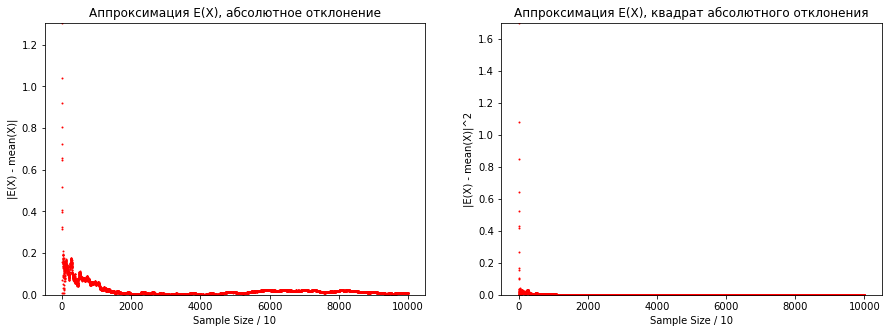

In [8]:
np.random.seed(123)                                       
x_new = chi2.rvs(size = 100000, df = 10)                
step = 10                                                                                                
m = int(len(x_new) / step)                              
x_mean = np.zeros(m)                                    
for i in range(0, m):
    x_mean[i] = np.mean(x_new[0:((i + 1) * step - 1)])  
dev = abs(x_mean - 10)
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.xlabel('Sample Size / ' + str(step))
plt.ylabel('|E(X) - mean(X)|')
plt.ylim(ymin = 0, ymax = max(dev))
plt.title('Аппроксимация E(X), абсолютное отклонение')
plt.plot(dev, 'ro', markersize = 1)
x_mean = np.zeros(m)                                    
for i in range(0, m):
    x_mean[i] = np.mean(x_new[0:((i + 1) * step - 1)])  
dev1 = abs(x_mean - 10) ** 2
plt.subplot(1, 2, 2)
plt.xlabel('Sample Size / ' + str(step))
plt.ylabel('|E(X) - mean(X)|^2')
plt.ylim(ymin = 0, ymax = max(dev1))
plt.title('Аппроксимация E(X), квадрат абсолютного отклонения')
plt.plot(dev1, 'ro', markersize = 1);

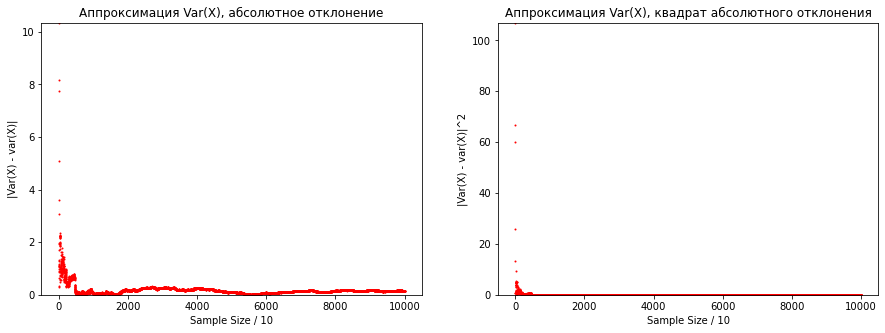

In [9]:
for i in range(0, m):
    x_mean[i] = np.var(x_new[0:((i + 1) * step - 1)])  
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
dev = abs(x_mean - 20)        
plt.xlabel('Sample Size / ' + str(step))
plt.ylabel('|Var(X) - var(X)|')
plt.ylim(ymin = 0, ymax = max(dev))
plt.title('Аппроксимация Var(X), абсолютное отклонение')
plt.plot(dev, 'ro', markersize = 1)
plt.subplot(1, 2, 2)
dev1 = abs(x_mean - 20) ** 2       
plt.xlabel('Sample Size / ' + str(step))
plt.ylabel('|Var(X) - var(X)|^2')
plt.ylim(ymin = 0, ymax = max(dev1))
plt.title('Аппроксимация Var(X), квадрат абсолютного отклонения')
plt.plot(dev1, 'ro', markersize = 1);

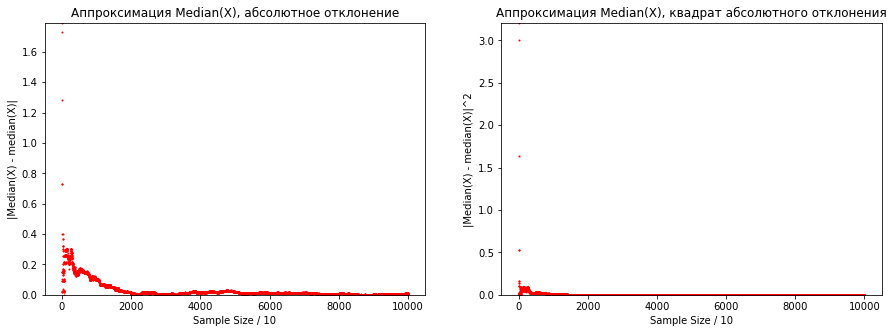

In [10]:
for i in range(0, m):
    x_mean[i] = np.median(x_new[0:((i + 1) * step - 1)])  
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
dev = abs(x_mean - (10 - 2/3))        
plt.xlabel('Sample Size / ' + str(step))
plt.ylabel('|Median(X) - median(X)|')
plt.ylim(ymin = 0, ymax = max(dev))
plt.title('Аппроксимация Median(X), абсолютное отклонение')
plt.plot(dev, 'ro', markersize = 1)
plt.subplot(1, 2, 2)
dev1 = abs(x_mean - (10 - 2/3)) ** 2       
plt.xlabel('Sample Size / ' + str(step))
plt.ylabel('|Median(X) - median(X)|^2')
plt.ylim(ymin = 0, ymax = max(dev1))
plt.title('Аппроксимация Median(X), квадрат абсолютного отклонения')
plt.plot(dev1, 'ro', markersize = 1);

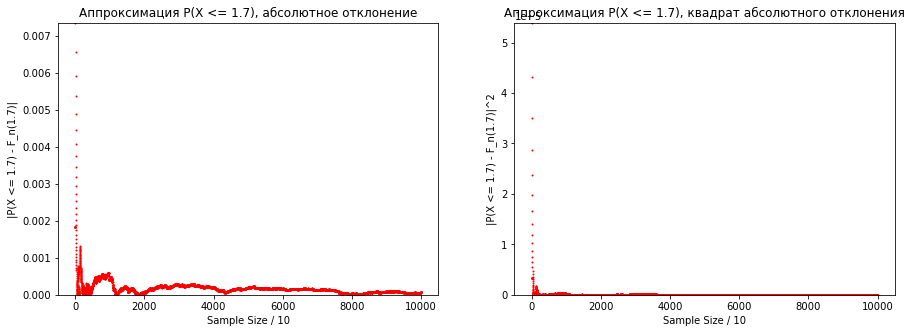

In [12]:
for i in range(0, m):
    x_mean[i] = np.mean(x_new[0:((i + 1) * step - 1)] <= 1.7)  
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
dev = abs(x_mean - chi2.cdf(1.7, df = 10))        
plt.xlabel('Sample Size / ' + str(step))
plt.ylabel('|P(X <= 1.7) - F_n(1.7)|')
plt.ylim(ymin = 0, ymax = max(dev))
plt.title('Аппроксимация P(X <= 1.7), абсолютное отклонение')
plt.plot(dev, 'ro', markersize = 1)
plt.subplot(1, 2, 2)
dev1 = abs(x_mean - chi2.cdf(1.7, df = 10)) ** 2       
plt.xlabel('Sample Size / ' + str(step))
plt.ylabel('|P(X <= 1.7) - F_n(1.7)|^2')
plt.ylim(ymin = 0, ymax = max(dev1))
plt.title('Аппроксимация P(X <= 1.7), квадрат абсолютного отклонения')
plt.plot(dev1, 'ro', markersize = 1);


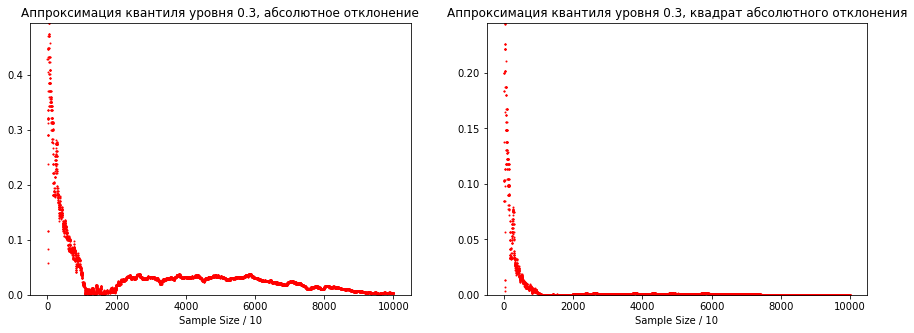

In [13]:
for i in range(0, m):
    x_mean[i] = np.quantile(x_new[0:((i + 1) * step - 1)], 0.3)  
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
dev = abs(x_mean - 7.2672)  #значение примерное, взято из таблицы      
plt.xlabel('Sample Size / ' + str(step))
plt.ylim(ymin = 0, ymax = max(dev))
plt.title('Аппроксимация квантиля уровня 0.3, абсолютное отклонение')
plt.plot(dev, 'ro', markersize = 1)
plt.subplot(1, 2, 2)
dev1 = abs(x_mean - 7.2672) ** 2 #значение примерное, взято из таблицы      
plt.xlabel('Sample Size / ' + str(step))
plt.ylim(ymin = 0, ymax = max(dev1))
plt.title('Аппроксимация квантиля уровня 0.3, квадрат абсолютного отклонения')
plt.plot(dev1, 'ro', markersize = 1);